In [ ]:
# ÎèôÏãú Ï∂úÌòÑ ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ±
# Î™©Ìëú: ÌäπÏ†ï Îã®Ïñ¥Í∞Ä Î¨∏Ïû•ÏóêÏÑú Ìï®Íªò Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îì§Í≥º ÏñºÎßàÎÇò ÏûêÏ£º Ïó∞Í≤∞ÎêòÎäîÏßÄ ÏãúÍ∞ÅÌôî

# ÎîïÏÖîÎÑàÎ¶¨ Î®ºÏ†Ä Ï†ÄÏû•

from collections import defaultdict
import pandas as pd

# Î∂ÑÏÑùÌï† ÌååÏùº Î™©Î°ù
file_paths = {
    "Ïù¥Ï§ÄÏÑù": "lee_junseok_tagged_filtered_ver2.csv",
    "Ïù¥Ïû¨Î™Ö": "lee_jaemyung_tagged_filtered.csv",
    "ÍπÄÎ¨∏Ïàò": "kim_moonsu_tagged_filtered.csv"
}

# Ï†ïÏπòÏù∏Î≥Ñ Í≥µÏ∂úÌòÑ ÎîïÏÖîÎÑàÎ¶¨ Ï†ÄÏû•Ïö©
cooccurrence_dict = {}

for name, path in file_paths.items():
    df = pd.read_csv(path)
    
    # Í≥µÏ∂úÌòÑ Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî
    cooccurrence = defaultdict(lambda: defaultdict(int))
    
    for sentence in df['tagged'].dropna():
        tokens = [token.rsplit("(", 1)[0] for token in sentence.split() if '(' in token]
        unique_tokens = list(set(tokens))  # Ï§ëÎ≥µ Ï†úÍ±∞

        for i in range(len(unique_tokens)):
            for j in range(i + 1, len(unique_tokens)):
                w1, w2 = unique_tokens[i], unique_tokens[j]
                cooccurrence[w1][w2] += 1
                cooccurrence[w2][w1] += 1

    cooccurrence_dict[name] = cooccurrence  # Ï†ÄÏû•

# ‚úÖ cooccurrence_dict ÏïàÏóê Ï†ïÏπòÏù∏Î≥Ñ Í≥µÏ∂úÌòÑ ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä Ï†ÄÏû•Îê©ÎãàÎã§!
# ÏòàÏãú Ï†ëÍ∑º: cooccurrence_dict['Ïù¥Ï§ÄÏÑù']['Ï†ïÏπò']['Í∞úÌòÅ']  ‚Üí 'Ï†ïÏπò'ÏôÄ 'Í∞úÌòÅ'Ïù¥ Ìï®Íªò Îì±Ïû•Ìïú ÌöüÏàò



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


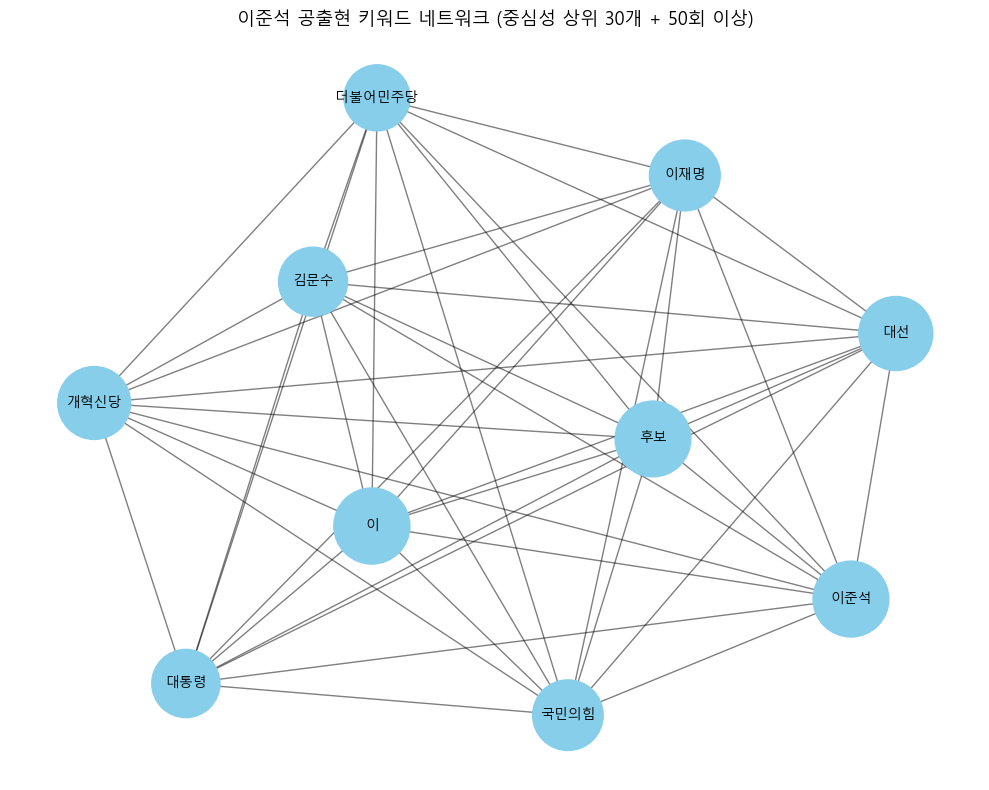

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx

# ÏãúÍ∞ÅÌôîÌï† ÎåÄÏÉÅ Ï†ïÏπòÏù∏ Ïù¥Î¶Ñ
target = "Ïù¥Ï§ÄÏÑù"

# Í≥µÏ∂úÌòÑ ÎîïÏÖîÎÑàÎ¶¨ÏóêÏÑú Ìï¥Îãπ Ï†ïÏπòÏù∏ Í≤ÉÎßå Í∞ÄÏ†∏Ïò§Í∏∞
cooccur = cooccurrence_dict[target]

# NetworkX Í∑∏ÎûòÌîÑ Ï¥àÍ∏∞Ìôî
G = nx.Graph()
threshold = 50  # ‚úÖ Í≥µÏ∂úÌòÑ ÏµúÏÜå Í∏∞Ï§ÄÏùÑ ÎÜíÏûÑ

# Î∂àÏö©Ïñ¥ Ï†ïÏùò
stopwords = {'ÎåÄÌïò', 'Ï£º', 'Îëê', 'Îêò', 'ÏúÑÌïò', 'Ìïò', 'ÏóÜ', 'Í∞ô', 'Îßê', 'Ïûà', 'Ïïä', 'ÏïÑÎãà', 'Ï†Ñ', 'Í∑∏', 'Î≥¥', 'Ïïä', 'Ïù¥ÎÇ†', 'ÏÑ†Í±∞', 'Ìïú', 'Í∞Ä', 'Í∏∞Ïûê', 'Ïïà'}

# Í∞ÑÏÑ† Ï∂îÍ∞Ä + Î∂àÏö©Ïñ¥ Ï†úÍ±∞
for w1, neighbors in cooccur.items():
    if w1 in stopwords:
        continue
    for w2, count in neighbors.items():
        if w2 in stopwords:
            continue
        if count >= threshold:
            G.add_edge(w1, w2, weight=count)

# Ï§ëÏã¨ÏÑ± Í≥ÑÏÇ∞
degree_dict = nx.degree_centrality(G)

# ‚úÖ Ï§ëÏã¨ÏÑ±Ïù¥ ÎÜíÏùÄ ÎÖ∏Îìú ÏÉÅÏúÑ 10Í∞úÎßå Ï∂îÏ∂ú
top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:10]
H = G.subgraph(top_nodes)

# ÎÖ∏Îìú ÌÅ¨Í∏∞ = Ïó∞Í≤∞ Ï§ëÏã¨ÏÑ± Í∏∞Î∞ò
node_size = [degree_dict[n] * 3000 for n in H.nodes]

# Ìè∞Ìä∏ ÏÑ§Ï†ï
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# Î†àÏù¥ÏïÑÏõÉ & ÏãúÍ∞ÅÌôî
pos = nx.spring_layout(H, k=1.2, seed=42)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(H, pos, node_color='skyblue', node_size=node_size)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_family='Malgun Gothic', font_size=10)

plt.title(f"{target} Í≥µÏ∂úÌòÑ ÌÇ§ÏõåÎìú ÎÑ§Ìä∏ÏõåÌÅ¨ (Ï§ëÏã¨ÏÑ± ÏÉÅÏúÑ 30Í∞ú + {threshold}Ìöå Ïù¥ÏÉÅ)", fontsize=13)
plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# Ï§ëÏã¨ÏÑ± Í≥ÑÏÇ∞
degree_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

# | Ï§ëÏã¨ÏÑ± Ï¢ÖÎ•ò              | ÏùòÎØ∏                             | Ïñ¥Îñ§ Îã®Ïñ¥Í∞Ä ÎÜíÍ≤å ÎÇòÏò§ÎäîÏßÄ      |
# | ---------------------- | -------------------------------- | -------------------------- |
# | **Degree Ï§ëÏã¨ÏÑ±**       | Ïó∞Í≤∞Îêú Îã®Ïñ¥ Ïàò (Ïó∞Í≤∞Îêú Í∞ÑÏÑ† Ïàò)      | Í∞ÄÏû• ÎßéÏù¥ Í≥µÏ∂úÌòÑÎêú Îã®Ïñ¥       |
# | **Betweenness Ï§ëÏã¨ÏÑ±**  | Îã§Î•∏ Îã®Ïñ¥Ïåç ÏÇ¨Ïù¥Ïùò 'Ï§ëÍ∞Ñ Í≤ΩÏú†ÏßÄ' Ïó≠Ìï† | Ïó∞Í≤∞Îã§Î¶¨, Ï§ëÏû¨Ïûê Ïó≠Ìï†         |
# | **Closeness Ï§ëÏã¨ÏÑ±**    |  Îã§Î•∏ Îã®Ïñ¥Îì§Í≥º ÏñºÎßàÎÇò Í∞ÄÍπåÏö¥ÏßÄ       | ÎÑ§Ìä∏ÏõåÌÅ¨ Ï†ÑÏ≤¥ÏôÄ Ïûò Ïó∞Í≤∞Îêú Îã®Ïñ¥  |
# | **Eigenvector Ï§ëÏã¨ÏÑ±**  | ÏòÅÌñ•Î†• ÏûàÎäî Îã®Ïñ¥Îì§Í≥º Ïó∞Í≤∞ÎêòÏñ¥ ÏûàÎäîÏßÄ  | 'ÏòÅÌñ•Î†• ÏûàÎäî ÏπúÍµ¨Í∞Ä ÎßéÏùÄ Îã®Ïñ¥' |


# Ï†ïÎ¶¨: Ï§ëÏã¨ÏÑ± ÏßÄÌëúÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥¥Í∏∞
df_centrality = pd.DataFrame({
    "Degree": degree_centrality,
    "Betweenness": betweenness,
    "Closeness": closeness,
    "Eigenvector": eigenvector
})

# ÏÉÅÏúÑ Îã®Ïñ¥ Î≥¥Í∏∞
print(df_centrality.sort_values("Degree", ascending=False).head(50))


          Degree  Betweenness  Closeness  Eigenvector
Ïù¥       1.000000     0.125459   1.000000     0.100167
Ïù¥Ï§ÄÏÑù     0.993730     0.113988   0.993769     0.100150
ÌõÑÎ≥¥      0.990596     0.110880   0.990683     0.100136
ÎåÄÏÑ†      0.946708     0.083725   0.949405     0.099811
Í∞úÌòÅÏã†Îãπ    0.918495     0.071596   0.924638     0.099522
Ïù¥Ïû¨Î™Ö     0.866249     0.054519   0.882028     0.098862
Íµ≠ÎØºÏùòÌûò    0.859979     0.053008   0.877177     0.098735
ÍπÄÎ¨∏Ïàò     0.822362     0.043963   0.849157     0.098108
ÎåÄÌÜµÎ†π     0.803553     0.041578   0.835808     0.097636
ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ  0.754441     0.031714   0.802852     0.096706
ÏÑúÏö∏      0.607106     0.013291   0.717929     0.092749
Ï†ïÏπò      0.584117     0.011819   0.706273     0.091492
ÍπÄ       0.547544     0.008917   0.688489     0.090176
ÏßÄ       0.529781     0.007341   0.680171     0.089986
ÏßÄÎÇò      0.527691     0.007373   0.679205     0.089773
ÏßÄÏßÄ      0.525601     0.008418   0.678242     0.088368



üìå Degree Ï§ëÏã¨ÏÑ± Í∏∞Ï§Ä ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥


Degree
Ïù¥       1.000000
Ïù¥Ï§ÄÏÑù     0.993730
ÌõÑÎ≥¥      0.990596
ÎåÄÏÑ†      0.946708
Í∞úÌòÅÏã†Îãπ    0.918495
Ïù¥Ïû¨Î™Ö     0.866249
Íµ≠ÎØºÏùòÌûò    0.859979
ÍπÄÎ¨∏Ïàò     0.822362
ÎåÄÌÜµÎ†π     0.803553
ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ  0.754441
ÏÑúÏö∏      0.607106
Ï†ïÏπò      0.584117
ÍπÄ       0.547544
ÏßÄ       0.529781
ÏßÄÎÇò      0.527691
ÏßÄÏßÄ      0.525601
ÎÇòÏò§      0.510972
Ïó¥Î¶¨      0.505747
Î≥¥Ïù¥      0.499478
Î∞ùÌûà      0.489028
Ïò§       0.489028
Íµ≠ÎØº      0.487983
Î∞õ       0.472309
Ïú§ÏÑùÏó¥     0.472309
ÎÇ¥       0.458725
ÎØºÏ£ºÎãπ     0.448276
ÏÉùÍ∞Å      0.445141
ÏúÑÏõêÌöå     0.445141
Ï§ëÏïô      0.432602
Ïö∞Î¶¨      0.417973
Íµ≠Ìöå      0.413793
Îãπ       0.411703
Î≥¥Ïàò      0.407524
Ï†Ä       0.399164
Î¨∏Ï†ú      0.399164
ÏÇ¨Îûå      0.398119
Îã§       0.369906
Îã®Ïùº      0.368861
ÌÜ†Î°†      0.363636
ÏßÄÍ∏à      0.360502
ÎåÄÌëú      0.359457
ÌÅ¨       0.353187
Í∞ÄÎä•      0.353187
Ïïû       0.353187
Ï†ïÏ±Ö      0.350052
ÏùòÏõê      0.345873
ÌÜµÌïò      0.344828
Ïùº       0.339603
ÏãúÏûë      0.337513
TV      0.333333


üìå Betweenness Ï§ëÏã¨ÏÑ± Í∏∞Ï§Ä ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥


Betweenness
Ïù¥          0.125459
Ïù¥Ï§ÄÏÑù        0.113988
ÌõÑÎ≥¥         0.110880
ÎåÄÏÑ†         0.083725
Í∞úÌòÅÏã†Îãπ       0.071596
Ïù¥Ïû¨Î™Ö        0.054519
Íµ≠ÎØºÏùòÌûò       0.053008
ÍπÄÎ¨∏Ïàò        0.043963
ÎåÄÌÜµÎ†π        0.041578
ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ     0.031714
ÏÑúÏö∏         0.013291
Ï†ïÏπò         0.011819
ÍπÄ          0.008917
ÏßÄÏßÄ         0.008418
ÏßÄÎÇò         0.007373
ÏßÄ          0.007341
ÎÇòÏò§         0.006382
Ïó¥Î¶¨         0.006186
Î∞ùÌûà         0.006102
Î≥¥Ïù¥         0.005641
Íµ≠ÎØº         0.005563
Ïò§          0.005424
Î∞õ          0.004737
Ïú§ÏÑùÏó¥        0.004689
ÎÇ¥          0.004237
ÏúÑÏõêÌöå        0.004164
ÏÉùÍ∞Å         0.003794
ÎØºÏ£ºÎãπ        0.003783
Ï§ëÏïô         0.003555
Ïö∞Î¶¨         0.002994
Íµ≠Ìöå         0.002953
Î≥¥Ïàò         0.002771
Îãπ          0.002708
Î¨∏Ï†ú         0.002505
Ï†Ä          0.002487
ÏÇ¨Îûå         0.002396
Îã®Ïùº         0.002272
Ï†ïÏ±Ö         0.002265
ÌÜ†Î°†         0.001979
Îã§          0.001607
ÏßÄÍ∏à         0.001464
TV         0.001451
ÌÅ¨          0.001412
Í∞ÄÎä•         0.001397
ÎåÄÌëú         0.001395
ÏùòÏõê         0.001295
Ïïû          0.001253
ÌÜµÌïò         0.001202
Ïùº          0.001145
ÏãúÏûë         0.001027


üìå Closeness Ï§ëÏã¨ÏÑ± Í∏∞Ï§Ä ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥


Closeness
Ïù¥        1.000000
Ïù¥Ï§ÄÏÑù      0.993769
ÌõÑÎ≥¥       0.990683
ÎåÄÏÑ†       0.949405
Í∞úÌòÅÏã†Îãπ     0.924638
Ïù¥Ïû¨Î™Ö      0.882028
Íµ≠ÎØºÏùòÌûò     0.877177
ÍπÄÎ¨∏Ïàò      0.849157
ÎåÄÌÜµÎ†π      0.835808
ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ   0.802852
ÏÑúÏö∏       0.717929
Ï†ïÏπò       0.706273
ÍπÄ        0.688489
ÏßÄ        0.680171
ÏßÄÎÇò       0.679205
ÏßÄÏßÄ       0.678242
ÎÇòÏò§       0.671579
Ïó¥Î¶¨       0.669231
Î≥¥Ïù¥       0.666435
Î∞ùÌûà       0.661826
Ïò§        0.661826
Íµ≠ÎØº       0.661368
Î∞õ        0.654583
Ïú§ÏÑùÏó¥      0.654583
ÎÇ¥        0.648814
ÎØºÏ£ºÎãπ      0.644444
ÏÉùÍ∞Å       0.643145
ÏúÑÏõêÌöå      0.643145
Ï§ëÏïô       0.638000
Ïö∞Î¶¨       0.632100
Íµ≠Ìöå       0.630435
Îãπ        0.629605
Î≥¥Ïàò       0.627953
Ï†Ä        0.624674
Î¨∏Ï†ú       0.624674
ÏÇ¨Îûå       0.624266
Îã§        0.613462
Îã®Ïùº       0.613069
ÌÜ†Î°†       0.611111
ÏßÄÍ∏à       0.609943
ÎåÄÌëú       0.609554
ÌÅ¨        0.607234
Í∞ÄÎä•       0.607234
Ïïû        0.607234
Ï†ïÏ±Ö       0.606080
ÏùòÏõê       0.604548
ÌÜµÌïò       0.604167
Ïùº        0.602266
ÏãúÏûë       0.601508
TV       0.600000


üìå Eigenvector Ï§ëÏã¨ÏÑ± Í∏∞Ï§Ä ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥


Eigenvector
Ïù¥          0.100167
Ïù¥Ï§ÄÏÑù        0.100150
ÌõÑÎ≥¥         0.100136
ÎåÄÏÑ†         0.099811
Í∞úÌòÅÏã†Îãπ       0.099522
Ïù¥Ïû¨Î™Ö        0.098862
Íµ≠ÎØºÏùòÌûò       0.098735
ÍπÄÎ¨∏Ïàò        0.098108
ÎåÄÌÜµÎ†π        0.097636
ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ     0.096706
ÏÑúÏö∏         0.092749
Ï†ïÏπò         0.091492
ÍπÄ          0.090176
ÏßÄ          0.089986
ÏßÄÎÇò         0.089773
ÎÇòÏò§         0.088970
Ïó¥Î¶¨         0.088640
Î≥¥Ïù¥         0.088609
ÏßÄÏßÄ         0.088368
Ïò§          0.087633
Íµ≠ÎØº         0.087388
Ïú§ÏÑùÏó¥        0.086982
Î∞ùÌûà         0.086785
Î∞õ          0.086705
ÎÇ¥          0.085859
ÎØºÏ£ºÎãπ        0.085379
ÏÉùÍ∞Å         0.085003
ÏúÑÏõêÌöå        0.084156
Ï§ëÏïô         0.083753
Ïö∞Î¶¨         0.082892
Íµ≠Ìöå         0.082677
Îãπ          0.082570
Î≥¥Ïàò         0.081799
ÏÇ¨Îûå         0.081792
Ï†Ä          0.081504
Î¨∏Ï†ú         0.081428
Îã§          0.079885
ÎåÄÌëú         0.078977
ÏßÄÍ∏à         0.078733
Ïïû          0.078644
Í∞ÄÎä•         0.077910
ÌÜ†Î°†         0.077784
ÌÅ¨          0.077778
ÌÜµÌïò         0.077623
ÏãúÏûë         0.077159
ÏùòÏõê         0.076922
Ïùº          0.076868
Îã®Ïùº         0.076802
Ï†ïÏ±Ö         0.075295
TV         0.074727

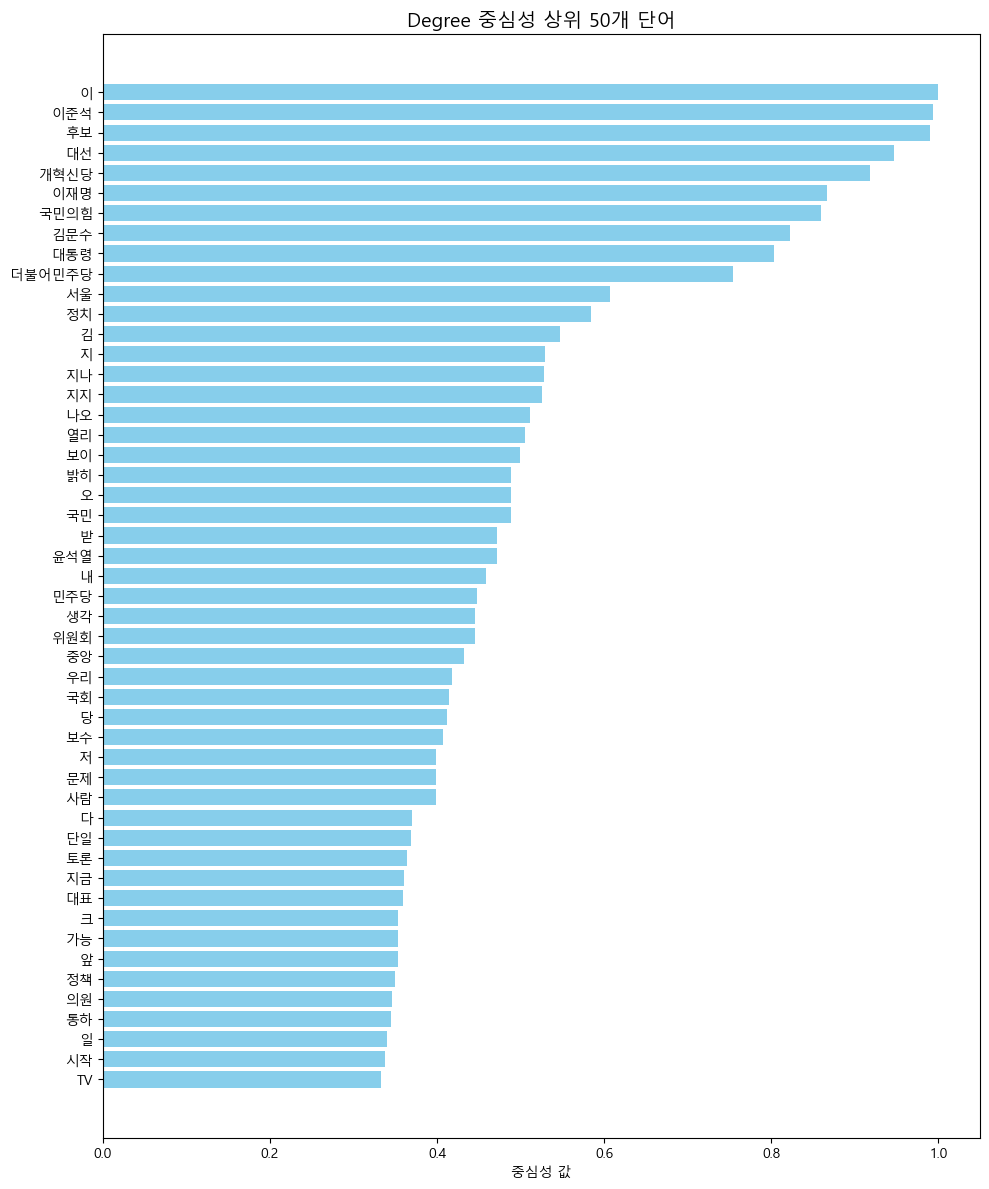

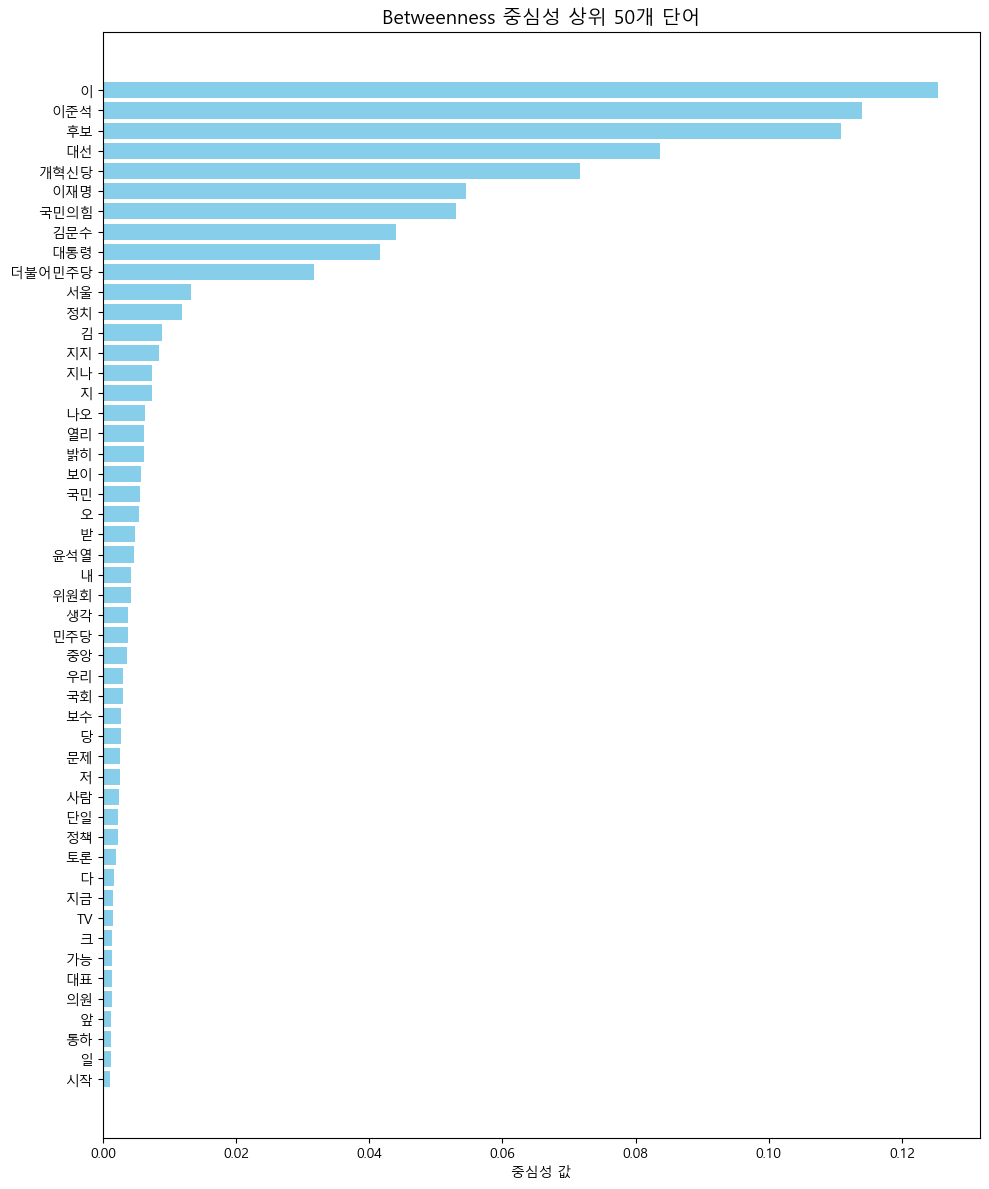

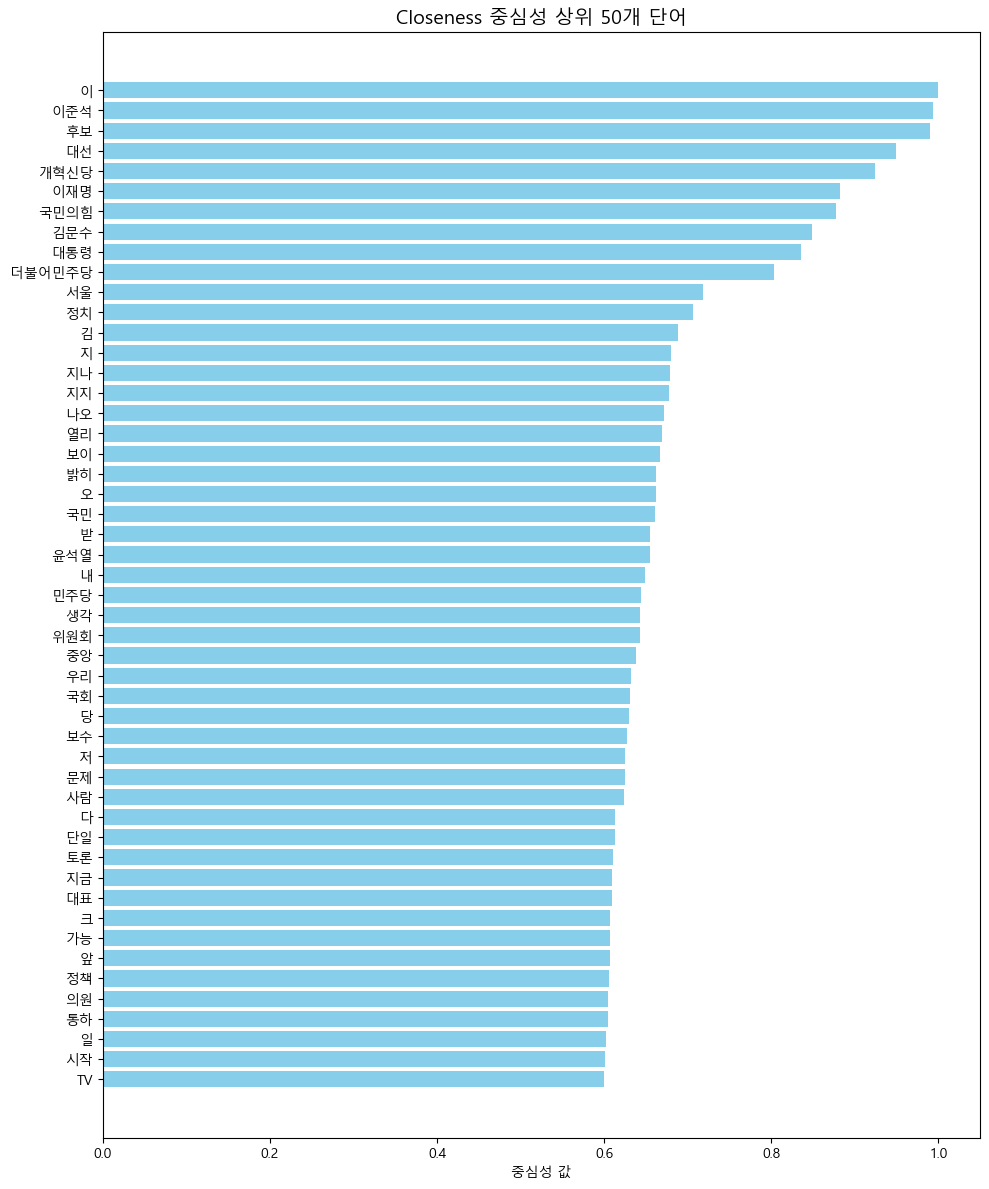

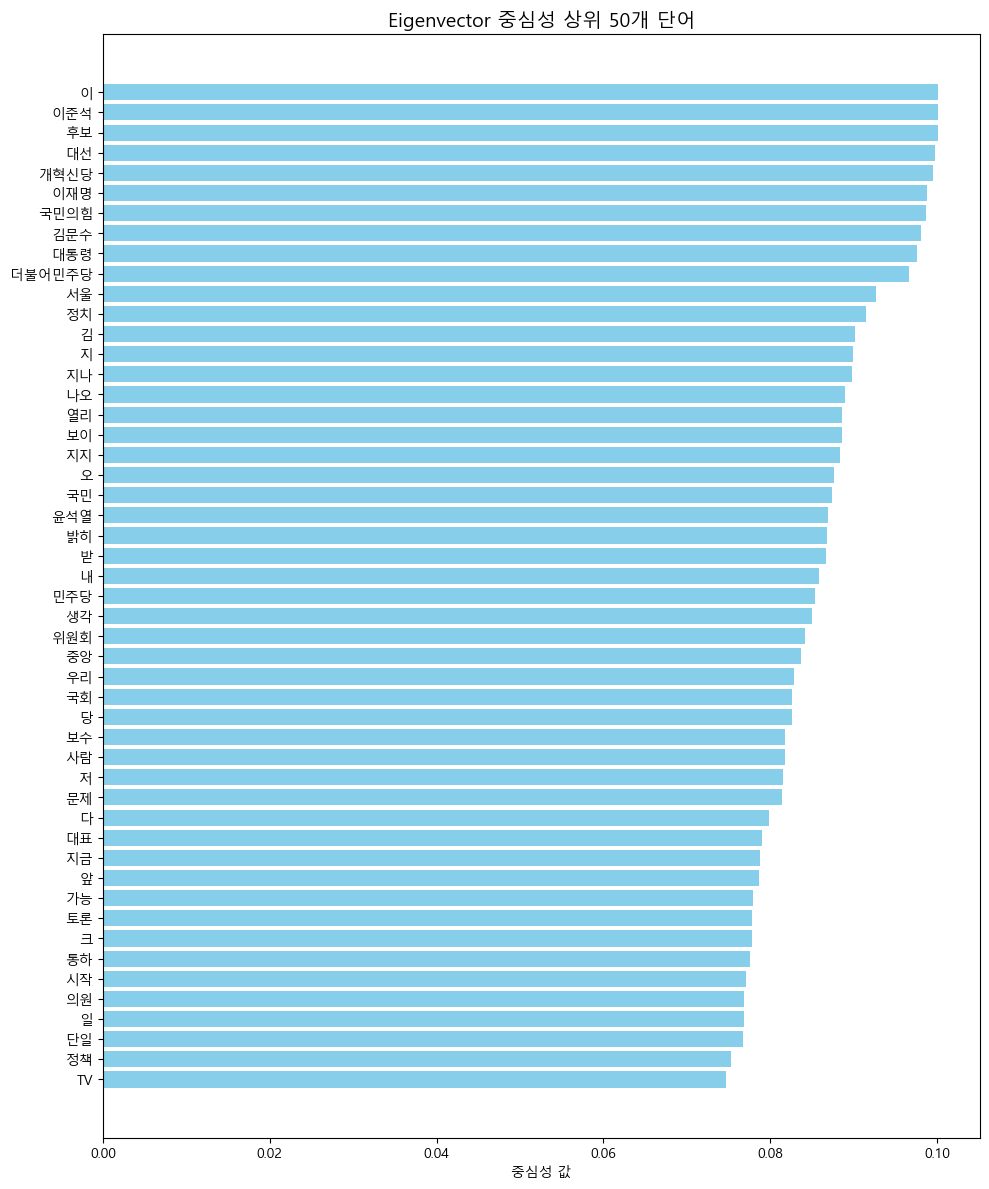

In [14]:
# Ï§ëÏã¨ÏÑ± ÏßÄÌëúÎ≥Ñ ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥ Ï∂úÎ†•
for col in df_centrality.columns:
    print(f"\nüìå {col} Ï§ëÏã¨ÏÑ± Í∏∞Ï§Ä ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥")
    display(df_centrality[[col]].sort_values(by=col, ascending=False).head(50))

for col in df_centrality.columns:
    top_50 = df_centrality[col].sort_values(ascending=False).head(50)
    
    plt.figure(figsize=(10, 12))
    plt.barh(top_50.index[::-1], top_50.values[::-1], color='skyblue')
    plt.title(f"{col} Ï§ëÏã¨ÏÑ± ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥", fontsize=14)
    plt.xlabel("Ï§ëÏã¨ÏÑ± Í∞í")
    plt.tight_layout()
    plt.show()